In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import secrets
import re
import seaborn as sns
import matplotlib.pyplot as plt
import lyricsgenius
from datetime import datetime
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")
genius = lyricsgenius.Genius(secrets.GENIUS_ACCESS_TOKEN)

In [5]:
def get_billboard_from_year(start_year, end_year):
    years = np.arange(start_year, end_year + 1).astype(int)
    top_songs = pd.DataFrame()

    for i in range(0, len(years)):
        year = years[i]
        print("Collecting songs from %i...", year)
        url = "https://www.billboard.com/charts/year-end/"+ str(year) +"/hot-100-songs"
        
        billboard_page = requests.get(url)
        soup = BeautifulSoup(billboard_page.text, "html.parser")

        titles = [div.text for div in soup.find_all("div", "ye-chart-item__title")]
        ranks = [div.text for div in soup.find_all("div", "ye-chart-item__rank")]
        artists = [div.text for div in soup.find_all("div", "ye-chart-item__artist")]

        for i in range(0, len(ranks)):
            row = {
                "Rank": ranks[i].replace("\n", "").strip(),
                "Song Title": titles[i].replace("\n", "").strip(),
                "Artist": artists[i].replace("\n", "").strip(),
                "Year": int(year)
            }
            top_songs = top_songs.append(row, ignore_index=True)
    return top_songs

In [7]:
all_songs = get_billboard_from_year(2017, 2019)

In [8]:
display(all_songs.head(5))
display(all_songs.tail(5))
display(all_songs.shape)

,Artist,Rank,Song Title,Year
0,Ed Sheeran,1,Shape Of You,2017.0
1,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,Despacito,2017.0
2,Bruno Mars,3,That's What I Like,2017.0
3,Kendrick Lamar,4,Humble.,2017.0
4,The Chainsmokers & Coldplay,5,Something Just Like This,2017.0


,Artist,Rank,Song Title,Year
295,Chase Rice,96,Eyes On You,2019.0
296,Dan + Shay,97,All To Myself,2019.0
297,Ariana Grande & Social House,98,Boyfriend,2019.0
298,P!nk,99,Walk Me Home,2019.0
299,Juice WRLD,100,Robbery,2019.0


(300, 4)

In [13]:
starttime = datetime.now()
print("Starting: " + str(starttime))
all_song_data = pd.DataFrame()
for i in range(0, len(all_songs)):
    song = all_songs.iloc[i]

    try:
        song_data = genius.search_song(song['Song Title'], song["Artist"])
#         print(dir(song_data))
        if(song_data):
            song_album = song_data.album
            featured_artists = song_data.featured_artists
            song_lyrics = song_data.lyrics.replace("\n", "")
            song_media = song_data.media
            song_url = song_data.url
            song_writer_artists = song_data.writer_artists
            song_producer_artists = song_data.producer_artists if song_data.producer_artists else ""
            song_album_url = song_data.album_url
            song_release_year = song_data.year
    except:
        song_album = "null"
        song_album_url = "null"
        featured_artists = "null"
        song_lyrics = "null"
        song_media = "null"
        song_url = "null"
        song_writer_artists = "null"
        song_release_year = "null"
        song_producer_artists = song_data.producer_artists
        song_album_url = song_data.album_url
        song_release_year = song_data.year
        
    row = {
        "Year": song['Year'],
        "Charting Rank": song['Rank'],
        "Song Title": song['Song Title'],
        "Artist": song['Artist'],
        "Album": song_album ,
        "Producers": song_producer_artists,
        "Writers": song_writer_artists,
        "Album URL": song_album_url,
        "Featured Artists": featured_artists,
        "Lyrics":  song_lyrics,
        "URL": song_url,
        "Media": song_media,
        "Release Year": song_release_year
    }
    all_song_data = all_song_data.append(row, ignore_index=True)

endtime = datetime.now()
print("Finished Job: " + str(endtime))
print("Elapsed Time: " + str(endtime - starttime))


Starting: 2020-04-26 21:05:07.981381
Searching for "Shape Of You" by Ed Sheeran...
Done.
Searching for "Despacito" by Luis Fonsi & Daddy Yankee Featuring Justin Bieber...
Done.
Searching for "That's What I Like" by Bruno Mars...
Done.
Searching for "Humble." by Kendrick Lamar...
Done.
Searching for "Something Just Like This" by The Chainsmokers & Coldplay...
Done.
Searching for "Bad And Boujee" by Migos Featuring Lil Uzi Vert...
Done.
Searching for "Closer" by The Chainsmokers Featuring Halsey...
Done.
Searching for "Body Like A Back Road" by Sam Hunt...
Done.
Searching for "Believer" by Imagine Dragons...
Done.
Searching for "Congratulations" by Post Malone Featuring Quavo...
Done.
Searching for "Say You Won't Let Go" by James Arthur...
Done.
Searching for "I'm The One" by DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne...
Done.
Searching for "XO TOUR Llif3" by Lil Uzi Vert...
Done.
Searching for "Mask Off" by Future...
Done.
Searching for "Unforgettable" by Fr

Done.
Searching for "MotorSport" by Migos, Nicki Minaj & Cardi B...
Done.
Searching for "I Like Me Better" by Lauv...
Done.
Searching for "Youngblood" by 5 Seconds Of Summer...
Done.
Searching for "Whatever It Takes" by Imagine Dragons...
Done.
Searching for "Ric Flair Drip" by Offset & Metro Boomin...
Done.
Searching for "I Fall Apart" by Post Malone...
Done.
Searching for "Pray For Me" by The Weeknd & Kendrick Lamar...
Done.
Searching for "Back To You" by Selena Gomez...
Done.
Searching for "Sicko Mode" by Travis Scott...
Done.
Searching for "Walk It Talk It" by Migos Featuring Drake...
Done.
Searching for "Gucci Gang" by Lil Pump...
Done.
Searching for "Him & I" by G-Eazy & Halsey...
Done.
Searching for "In My Blood" by Shawn Mendes...
Done.
Searching for "All The Stars" by Kendrick Lamar & SZA...
Done.
Searching for "Stir Fry" by Migos...
Done.
Searching for "Too Good At Goodbyes" by Sam Smith...
Done.
Searching for "Love." by Kendrick Lamar Featuring Zacari...
Done.
Searching for 

Done.
Searching for "Trampoline" by SHAED...
Done.
Searching for "Leave Me Alone" by Flipp Dinero...
Done.
Searching for "Breathin" by Ariana Grande...
Done.
Searching for "Bury A Friend" by Billie Eilish...
Done.
Searching for "Close Friends" by Lil Baby...
Done.
Searching for "Baby Shark" by Pinkfong...
Done.
Searching for "My Type" by Saweetie...
Done.
Searching for "Worth It" by YK Osiris...
Done.
Searching for "Only Human" by Jonas Brothers...
Done.
Searching for "Knockin' Boots" by Luke Bryan...
Done.
Searching for "Trip" by Ella Mai...
Done.
Searching for "Rumor" by Lee Brice...
Done.
Searching for "Swervin" by A Boogie Wit da Hoodie Featuring 6ix9ine...
Done.
Searching for "How Do You Sleep?" by Sam Smith...
Done.
Searching for "Baby" by Lil Baby & DaBaby...
Done.
Searching for "Look What God Gave Her" by Thomas Rhett...
Done.
Searching for "Good As You" by Kane Brown...
Done.
Searching for "Clout" by Offset Featuring Cardi B...
Done.
Searching for "Love Lies" by Khalid & Norma

,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0


(300, 13)

In [17]:
# all_song_data.to_pickle(r"stored_song_data.pickle")

In [5]:
loaded_song_data = pd.read_pickle("stored_song_data.pickle")

In [6]:
display(loaded_song_data.head(5))
display(loaded_song_data.shape)

,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0


(300, 13)

In [7]:
def plot_count_by_year(dataset):
    ['Year'], ['Rank']
    grouped_dataset = dataset.groupby('Year')
    sns.barplot(y=grouped_dataset['Charting Rank'].count(), x=grouped_dataset.count().index)
    plt.title("Number of songs with Genius data by year")
    plt.ylabel("Number of Songs")

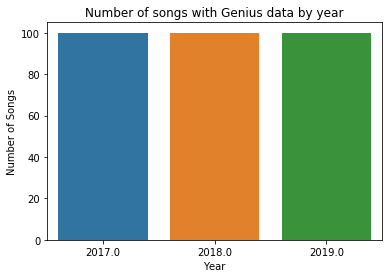

In [8]:
plot_count_by_year(loaded_song_data)

In [44]:
def add_spacy_data(dataset):
    
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    for i in range(0, len(dataset)):
        print("SpaCy now processing {} by {}".format(dataset.iloc[i]['Song Title'], dataset.iloc[i]['Artist']))
        song = re.sub(r'\n', '', dataset.iloc[i]["Lyrics"])
        doc = nlp(song)
        spacy_df = pd.DataFrame()
        for token in doc:
            row = {
                "word": token.text,
                "lemma": token.lemma_ if token.lemma_ != "-PRON-" else token.text ,
                "pos": token.pos_,
                "stop word": token.is_stop
            }
            spacy_df = spacy_df.append(row, ignore_index=True)
        verbs.append(" ".join(spacy_df['lemma'][spacy_df["pos"] == "VERB"].values))
        nouns.append(" ".join(spacy_df['lemma'][spacy_df["pos"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_df['lemma'][spacy_df["pos"] == "ADV"].values))
        corpus1 = " ".join(spacy_df['lemma'][spacy_df["stop word"] == False].values)
        corpus1 = re.sub(r'[^A-Za-z0-9]+', ' ', corpus1)
        corpus.append(corpus1)
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    return dataset

In [45]:
add_spacy_data(loaded_song_data)

SpaCy now processing Shape Of You by Ed Sheeran
SpaCy now processing Despacito by Luis Fonsi & Daddy Yankee Featuring Justin Bieber
SpaCy now processing That's What I Like by Bruno Mars
SpaCy now processing Humble. by Kendrick Lamar
SpaCy now processing Something Just Like This by The Chainsmokers & Coldplay
SpaCy now processing Bad And Boujee by Migos Featuring Lil Uzi Vert
SpaCy now processing Closer by The Chainsmokers Featuring Halsey
SpaCy now processing Body Like A Back Road by Sam Hunt
SpaCy now processing Believer by Imagine Dragons
SpaCy now processing Congratulations by Post Malone Featuring Quavo
SpaCy now processing Say You Won't Let Go by James Arthur
SpaCy now processing I'm The One by DJ Khaled Featuring Justin Bieber, Quavo, Chance The Rapper & Lil Wayne
SpaCy now processing XO TOUR Llif3 by Lil Uzi Vert
SpaCy now processing Mask Off by Future
SpaCy now processing Unforgettable by French Montana Featuring Swae Lee
SpaCy now processing 24K Magic by Bruno Mars
SpaCy now p

SpaCy now processing Gucci Gang by Lil Pump
SpaCy now processing Him & I by G-Eazy & Halsey
SpaCy now processing In My Blood by Shawn Mendes
SpaCy now processing All The Stars by Kendrick Lamar & SZA
SpaCy now processing Stir Fry by Migos
SpaCy now processing Too Good At Goodbyes by Sam Smith
SpaCy now processing Love. by Kendrick Lamar Featuring Zacari
SpaCy now processing This Is America by Childish Gambino
SpaCy now processing Nonstop by Drake
SpaCy now processing Heaven by Kane Brown
SpaCy now processing Bodak Yellow (Money Moves) by Cardi B
SpaCy now processing Freaky Friday by Lil Dicky Featuring Chris Brown
SpaCy now processing Gummo by 6ix9ine
SpaCy now processing Plug Walk by Rich The Kid
SpaCy now processing Wait by Maroon 5
SpaCy now processing Be Careful by Cardi B
SpaCy now processing Wolves by Selena Gomez X Marshmello
SpaCy now processing Bartier Cardi by Cardi B Featuring 21 Savage
SpaCy now processing God Is A Woman by Ariana Grande
SpaCy now processing Big Bank by YG 

SpaCy now processing Talk You Out Of It by Florida Georgia Line
SpaCy now processing Beautiful by Bazzi Featuring Camila Cabello
SpaCy now processing Eyes On You by Chase Rice
SpaCy now processing All To Myself by Dan + Shay
SpaCy now processing Boyfriend by Ariana Grande & Social House
SpaCy now processing Walk Me Home by P!nk
SpaCy now processing Robbery by Juice WRLD


,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0,find gome do talk come start trust will give n...,verse club place loverso bar friend table shot...,where fast then just then now now too now now ...,verse 1 The club good place find loverso bar ...
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0,make feel want put seem feel can spend make co...,priest thing condition dayHe night equality lo...,slowly slowly how how only very how soonsimply...,Intro Come memany priest good thing therechan...
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0,get pop pop drop drop rent -ami)wake serve get...,condo girl ass gon playerdrop beach house jamm...,around just alland so never never just alland ...,Verse 1 hey hey heyI get condo ManhattanBaby ...
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0,pray remember allowancesfinesse be live aid ca...,day meway syrup sandwich crime nigga counterfe...,now where way too then just still still just u...,intro nobody pray meIt day meway yeah yeah Ve...
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0,read see say look can turn can kiss[bridge wan...,verse book legend mythsachille goldhercule gif...,clearly where much just just just just where m...,verse 1 Chris martin i ve read book oldthe le...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Lambs & Lions,https://genius.com/albums/Chase-rice/Lambs-lions,Chase Rice,96,[],[Verse 1]\nWe've been to both Carolinas\nSeen ...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/227641', 'header_image...",2017-10-13,Eyes On You,https://genius.com/Chase-rice-eyes-on-you-lyrics,"[{'api_path': '/artists/227641', 'header_image...",2019.0,be get think miss gono doIf get be remember ro...,verse coast timeslondon memory matter girl eye...,up alland damn where matter there where no bet...,verse 1 we ve CarolinasSeen big Montana skyDr...
296,Dan + Shay,https://genius.com/albums/Dan-shay/Dan-shay,Dan + Shay,97,[],[Verse 1]\nI'm jealous of the blue jeans that ...,"[{'attribution': 'danandshay', 'provider': 'so...","[{'api_path': '/artists/259377', 'header_image...",2018-05-03,All To Myself,https://genius.com/Dan-shay-all-to-myself-lyrics,"[{'api_path': '/artists/25774', 'header_image_...",2019.0,ho

In [47]:
loaded_song_data.to_pickle(r"stored_song_data_with_spacy.pickle")

,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0,find gome do talk come start trust will give n...,verse club place loverso bar friend table shot...,where fast then just then now now too now now ...,verse 1 The club good place find loverso bar ...
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0,make feel want put seem feel can spend make co...,priest thing condition dayHe night equality lo...,slowly slowly how how only very how soonsimply...,Intro Come memany priest good thing therechan...
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0,get pop pop drop drop rent -ami)wake serve get...,condo girl ass gon playerdrop beach house jamm...,around just alland so never never just alland ...,Verse 1 hey hey heyI get condo ManhattanBaby ...
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0,pray remember allowancesfinesse be live aid ca...,day meway syrup sandwich crime nigga counterfe...,now where way too then just still still just u...,intro nobody pray meIt day meway yeah yeah Ve...
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0,read see say look can turn can kiss[bridge wan...,verse book legend mythsachille goldhercule gif...,clearly where much just just just just where m...,verse 1 Chris martin i ve read book oldthe le...


In [48]:
loaded_song_data_with_spacy =  pd.read_pickle("stored_song_data_with_spacy.pickle")

In [49]:
display(loaded_song_data.head())


,Album,Album URL,Artist,Charting Rank,Featured Artists,Lyrics,Media,Producers,Release Year,Song Title,URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus
0,÷ (Divide),https://genius.com/albums/Ed-sheeran/Divide,Ed Sheeran,1,[],[Verse 1]\nThe club isn't the best place to fi...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/12418', 'header_image_...",2017-01-06,Shape Of You,https://genius.com/Ed-sheeran-shape-of-you-lyrics,"[{'api_path': '/artists/7393', 'header_image_u...",2017.0,find gome do talk come start trust will give n...,verse club place loverso bar friend table shot...,where fast then just then now now too now now ...,verse 1 The club good place find loverso bar ...
1,Google Translate Sings,https://genius.com/albums/Malinda/Google-trans...,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,2,[],"[Intro]\nCome at me\nMany priests, the good th...","[{'provider': 'youtube', 'start': 0, 'type': '...",,2017-07-19,Despacito,https://genius.com/Malinda-google-translate-si...,"[{'api_path': '/artists/1460051', 'header_imag...",2017.0,make feel want put seem feel can spend make co...,priest thing condition dayHe night equality lo...,slowly slowly how how only very how soonsimply...,Intro Come memany priest good thing therechan...
2,24K Magic,https://genius.com/albums/Bruno-mars/24k-magic,Bruno Mars,3,[],"[Verse 1]\nHey, hey, hey\nI got a condo in Man...",[{'native_uri': 'spotify:track:0KKkJNfGyhkQ5aF...,"[{'api_path': '/artists/1012903', 'header_imag...",2016-01-30,That's What I Like,https://genius.com/Bruno-mars-thats-what-i-lik...,"[{'api_path': '/artists/1035208', 'header_imag...",2017.0,get pop pop drop drop rent -ami)wake serve get...,condo girl ass gon playerdrop beach house jamm...,around just alland so never never just alland ...,Verse 1 hey hey heyI get condo ManhattanBaby ...
3,DAMN.,https://genius.com/albums/Kendrick-lamar/Damn,Kendrick Lamar,4,[],[Intro]\nNobody pray for me\nIt's been that da...,"[{'provider': 'youtube', 'start': 6, 'type': '...","[{'api_path': '/artists/627151', 'header_image...",2017-03-30,Humble.,https://genius.com/Kendrick-lamar-humble-lyrics,"[{'api_path': '/artists/93851', 'header_image_...",2017.0,pray remember allowancesfinesse be live aid ca...,day meway syrup sandwich crime nigga counterfe...,now where way too then just still still just u...,intro nobody pray meIt day meway yeah yeah Ve...
4,Memories...Do Not Open,https://genius.com/albums/The-chainsmokers/Mem...,The Chainsmokers & Coldplay,5,[],[Verse 1: Chris Martin]\nI've been reading boo...,"[{'provider': 'youtube', 'start': 0, 'type': '...","[{'api_path': '/artists/1030536', 'header_imag...",2017-02-22,Something Just Like This,https://genius.com/The-chainsmokers-and-coldpl...,"[{'api_path': '/artists/150934', 'header_image...",2017.0,read see say look can turn can kiss[bridge wan...,verse book legend mythsachille goldhercule gif...,clearly where much just just just just where m...,verse 1 Chris martin i ve read book oldthe le...
